<a href="https://colab.research.google.com/github/Mahiyat/cnn-fashion-mnist/blob/main/CNN_Fashion_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow keras

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import plot_model
from keras.initializers import HeNormal
from keras.callbacks import ModelCheckpoint

In [3]:
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2
                        "Dress",        # index 3
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6
                        "Sneaker",      # index 7
                        "Bag",          # index 8
                        "Ankle boot"]   # index 9

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
n=5

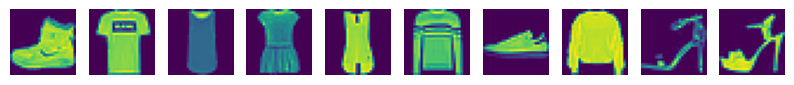

Label for each of the above images [9 0 0 3 0 2 7 2 5 5]


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(X_train[i])
  plt.axis('off')
plt.show()
print('Label for each of the above images %s' % (y_train[0:10]))

In [7]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

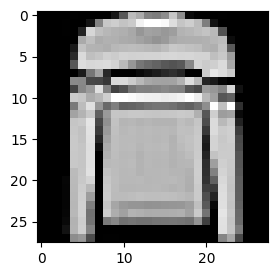

Label:  2


In [8]:
plt.figure(figsize=[3,3])
plt.imshow(X_train[n],cmap='gray')
plt.show()
print('Label: ', y_train[n])

In [9]:
# X_train = X_train.reshape((X_train.shape[0]), -1)
# X_test = X_test.reshape((X_test.shape[0]), -1)

In [10]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
(X_train, X_valid) = X_train[5000:], X_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [12]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_valid = to_categorical(y_valid)

In [13]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(55000, 28, 28) (10000, 28, 28) (55000, 10) (10000, 10)


In [14]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size = 2, input_shape=(28,28,1 ), kernel_initializer=HeNormal(), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=32, kernel_size=2, kernel_initializer=HeNormal(), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=2))

# model.add(Conv2D(filters=64, kernel_size=2, kernel_initializer=HeNormal(), activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=2))
# model.add(Conv2D(filters=256, kernel_size=2, kernel_initializer=HeNormal()))
# model.add(Activation('relu'))
# model.add(BatchNormalization())
# model.add(MaxPool2D(pool_size=2))
model.add(Flatten())
model.add(Dropout(0.5))

# model.add(Dense(512, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(256, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(128, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(64, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(32, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(16, kernel_initializer=HeNormal(), activation='relu'))

model.add(Dense(10, activation='softmax'))

In [15]:
optimizer = Adam(learning_rate = 0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)

In [17]:
history = model.fit(X_train, y_train, batch_size = 200, epochs = 100, verbose = 1, validation_data=(X_valid, y_valid), callbacks=[checkpointer])

Epoch 1/100
273/275 [============================>.] - ETA: 0s - loss: 0.8756 - accuracy: 0.6809
Epoch 1: val_loss improved from inf to 0.71351, saving model to model.weights.best.hdf5
275/275 [==============================] - 14s 7ms/step - loss: 0.8721 - accuracy: 0.6822 - val_loss: 0.7135 - val_accuracy: 0.7548
Epoch 2/100
 23/275 [=>............................] - ETA: 1s - loss: 0.4758 - accuracy: 0.8220

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


275/275 [==============================] - ETA: 0s - loss: 0.4261 - accuracy: 0.8451
Epoch 2: val_loss improved from 0.71351 to 0.35421, saving model to model.weights.best.hdf5
275/275 [==============================] - 2s 6ms/step - loss: 0.4261 - accuracy: 0.8451 - val_loss: 0.3542 - val_accuracy: 0.8694
Epoch 3/100
269/275 [============================>.] - ETA: 0s - loss: 0.3657 - accuracy: 0.8648
Epoch 3: val_loss did not improve from 0.35421
275/275 [==============================] - 1s 5ms/step - loss: 0.3654 - accuracy: 0.8649 - val_loss: 0.3616 - val_accuracy: 0.8620
Epoch 4/100
267/275 [============================>.] - ETA: 0s - loss: 0.3414 - accuracy: 0.8761
Epoch 4: val_loss improved from 0.35421 to 0.33297, saving model to model.weights.best.hdf5
275/275 [==============================] - 2s 6ms/step - loss: 0.3423 - accuracy: 0.8761 - val_loss: 0.3330 - val_accuracy: 0.8728
Epoch 5/100
269/275 [============================>.] - ETA: 0s - loss: 0.3274 - accuracy: 0.8790


In [18]:
model.load_weights('model.weights.best.hdf5')

In [19]:
results = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2739 - accuracy: 0.9117


In [20]:
print("Test accuracy: ", results[1])

Test accuracy:  0.9117000102996826


In [21]:
import numpy as np

313/313 [==============================] - 1s 2ms/step


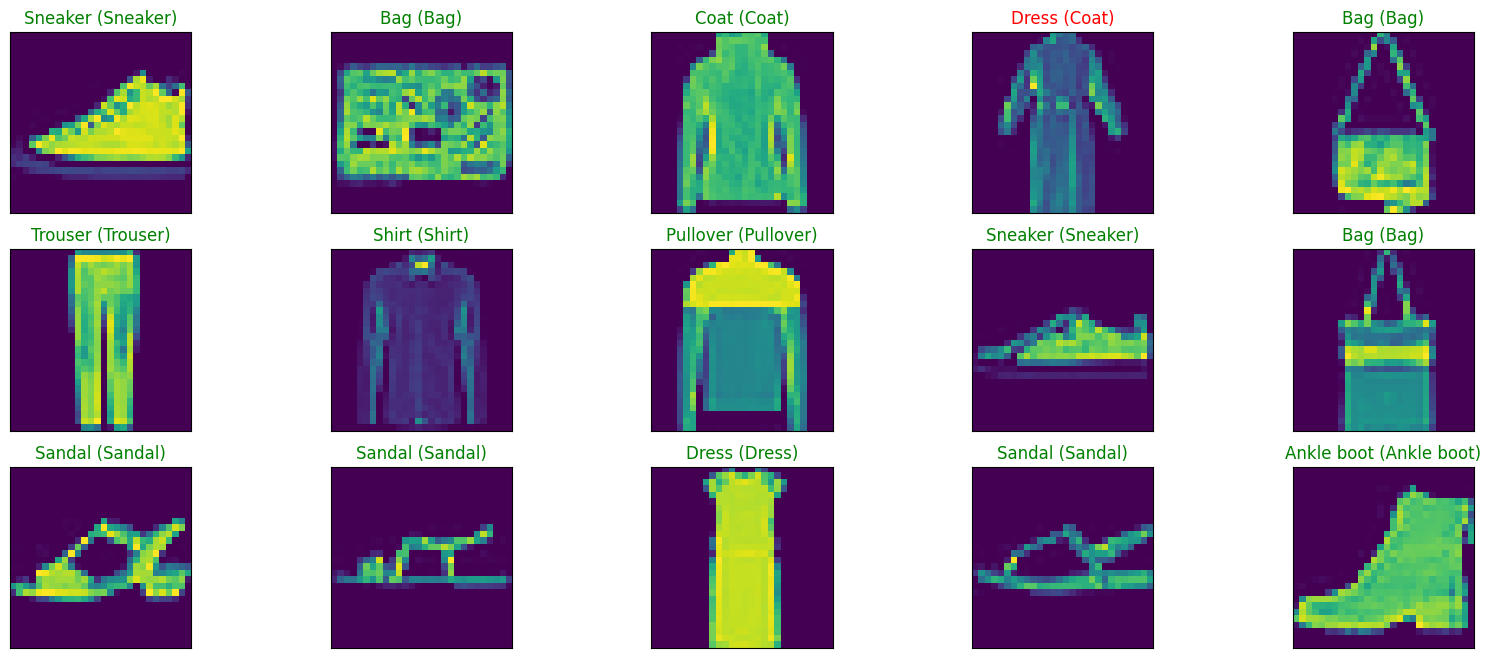

In [22]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index],
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))

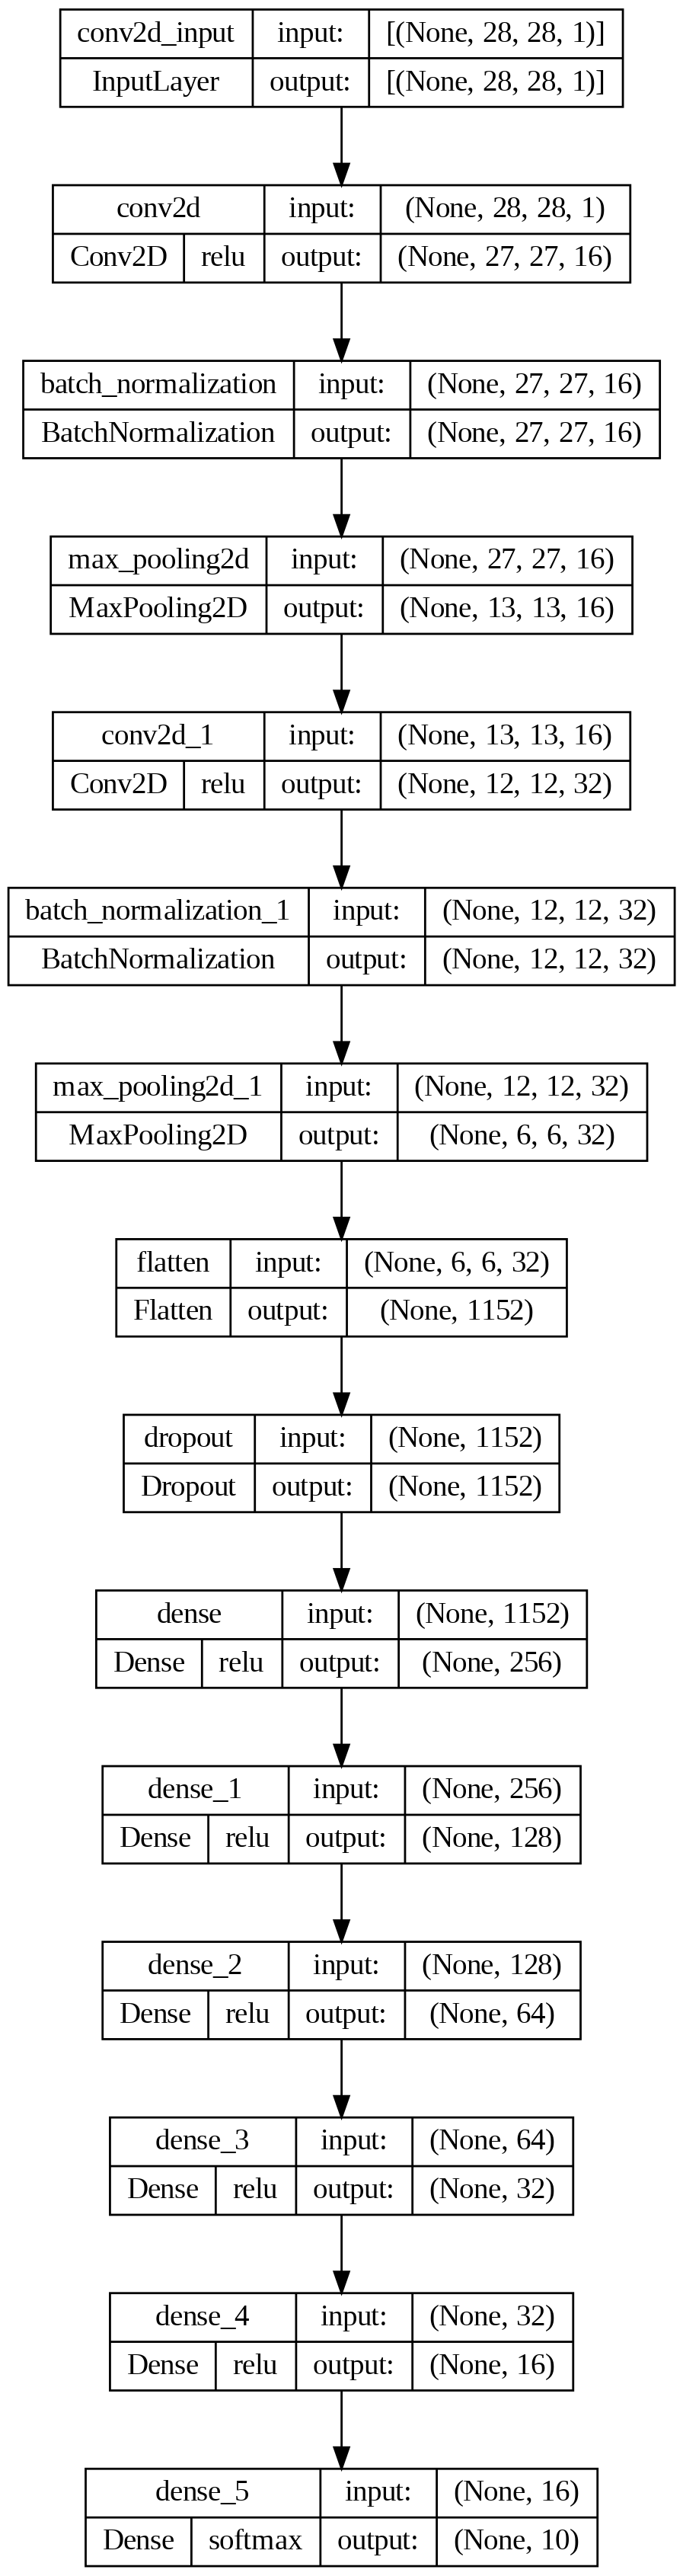

In [23]:
plot_model(
    model,
    to_file='model.png',
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=200,
    show_layer_activations=True,
    show_trainable=False
)